## Introduction to Python

In [ ]:
print('Hello world!')

: 

### Python classes


* Class > Makes the code ‘modular’. Classes can be re-used and enhanced by other classes `class Car:`
* Instance > Instance is an object of a class. You can create an instance of a class by calling the constructor `Car('blue', 'automatic')`
* Object > To use a class in a program, you must construct an object from a class  `my_car = Car('blue', 'automatic')`
* Method > When you call a function from an object it is called a method `my_car.start()`
* Instance attribute > They are associated with a particular object. Defined inside the `__init__()` constructor `print('Car Started?', my_car.started)`

* Class attribute > Defined outside of the `__init__()` constructor. Can be accessed from a class `print('Car model', Car.model)`


* Inerithance > Classes can be derived from another class. The derived class ‘inherits’ all features of the base class `my_car = Sedan('blue', 'automatic', 5)`




In [ ]:
class Car:

    model = 'Civic'

    def __init__(self, color, type):
        self.color = color
        self.type = type
        self.started = False
        self.stopped = False
        print('init_run')

    def start(self):
        print('Car Started')
        self.started = True
        self.stopped = False

    def stop(self):
        print('Car Stopped')
        self.stopped = True
        self.started = False

# Instantiate the class
my_car = Car('blue', 'automatic')

print(my_car)

# Call a method
my_car.start()


# Check the value of an instance variable
print('Car Started?', my_car.started)

# Check the value of a class variable
print('Car model', Car.model)

# Inheritance

class Sedan(Car):

    def __init__(self, color, type, seats):
        super().__init__(color, type)
        self.seats = seats

class ElectricSedan(Sedan):

    def __init__(self, color, type, seats, range_km):
        super().__init__(color, type, seats)
        self.range_km = range_km

my_car = Sedan('blue', 'automatic', 5)
print(my_car.color)
print(my_car.seats)
my_car.start()


my_future_car = ElectricSedan('red', 'automatic', 5, 500)
print(my_future_car.color)
print(my_future_car.seats)
print(my_future_car.range_km)
my_future_car.start()



## PyQGIS

### PyQGIS iface

In PyQGIS, iface refers to the interface object that provides access to various functionalities and components of the QGIS application. It stands for "QGIS interface" and acts as a gateway to interact with the QGIS application from within your Python scripts or plugins

In [ ]:
iface.activeLayer()
iface.messageBar().pushMessage("Info", "This is an informational message", level=Qgis.Info)
iface.mapCanvas().extent()

: 

### PyQGIS classes

Documentation: https://qgis.org/pyqgis/master/index.html


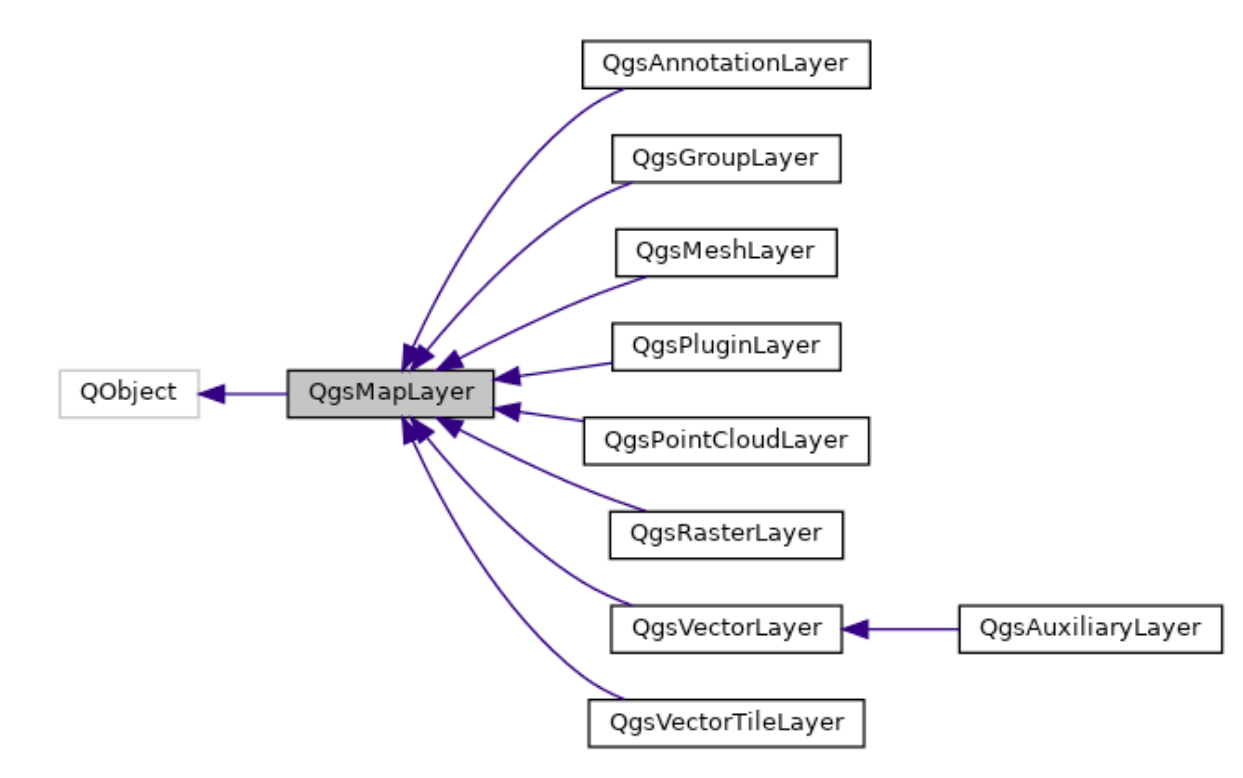

####Distance calculation (QgsDistanceArea)

In [ ]:
from qgis.core import QgsDistanceArea, QgsPointXY, QgsUnitTypes

san_francisco = (37.7749, -122.4194)
new_york = (40.661, -73.944)

d = QgsDistanceArea()
d.setEllipsoid('WGS84')


lat1, lon1 = san_francisco
lat2, lon2 = new_york
# Remember the order is X,Y
point1 = QgsPointXY(lon1, lat1)
point2 = QgsPointXY(lon2, lat2)

distance = d.measureLine([point1, point2])
print(distance/1000)
print('Distance in meters', distance)

distance_km = d.convertLengthMeasurement(distance, QgsUnitTypes.DistanceKilometers)
print('Distance in kilometers', distance_km)

distance_mi = d.convertLengthMeasurement(distance, QgsUnitTypes.DistanceMiles)
print('Distance in miles', distance_mi)

### QGIS Interface API (QgisInterface)
You are ready to dive into the PyQGIS API now. In this section, we will focus on the QgisInterface class - which provides methods for interaction with the QGIS environment. When QGIS is running, a variable called iface is set up to provide an object of the class QgisInterface to interact with the running QGIS environment. This interface allows access to the map canvas, menus, toolbars and other parts of the QGIS application. Python Console and Plugins can use iface to access various parts of the QGIS interface.


In [ ]:
title = iface.mainWindow().windowTitle()
new_title = title.replace('QGIS', 'My QGIS')
iface.mainWindow().setWindowTitle(new_title)



###GUI Programming basic
Qt is a free and open-source widget toolkit for creating graphical user interfaces as well as cross-platform applications. QGIS is built using the Qt platform. Both Qt and QGIS itself have well-documented APIs that should be used when writing Python code to be run within QGIS.

PyQt is the Python interface to Qt. PyQt provides classes and functions to interact with Qt widgets.


In [ ]:
mb = QMessageBox()
mb.setText('Click OK to confirm')
mb.setStandardButtons(QMessageBox.Ok | QMessageBox.Cancel)
return_value = mb.exec()
if return_value == QMessageBox.Ok:
    print('You pressed OK')
elif return_value == QMessageBox.Cancel:
    print('You pressed Cancel')

### Load vector layer

In [ ]:
uri = "/home/jack/corsi/QGIS-PhD/data/data_modulo_2/edificati_32633.gpkg"
vlayer = iface.addVectorLayer(uri, "edificati", "ogr")
print(vlayer)
iface.showAttributeTable(vlayer)

for field in vlayer.fields():
    print(field.name())

for feature in vlayer.getFeatures():
    print(feature["regione"])

### Filter features

In [ ]:
my_char = "A"
vlayer.setSubsetString("regione LIKE '"+my_char+"%'")
print("The following country names start with {}:".format(my_char))
iface.showAttributeTable(vlayer)

vlayer.setSubsetString("")

### Load raster layer

In [ ]:
uri_r = "/home/jack/corsi/QGIS-PhD/data/data_modulo_2/dtm.tif"
rlayer = iface.addRasterLayer(uri_r,"dtm","gdal")

if rlayer.isValid():
    print("This is a valid raster layer!")
else:
    print("This raster layer is invalid!")

print("Width: {}px".format(rlayer.width()))
print("Height: {}px".format(rlayer.height()))
print("Extent: {}".format(rlayer.extent().toString()))

stats = rlayer.dataProvider().bandStatistics(1)
print("Min value: {}".format(stats.minimumValue))
print("Max value: {}".format(stats.maximumValue))

### From array to raster

In [ ]:
from osgeo import gdal,osr,ogr
import numpy as np
uri_r = "/home/jack/corsi/QGIS-PhD/data/data_modulo_2/B4.tif"

ds=gdal.Open(uri_r)
nodata=ds.GetRasterBand(1).GetNoDataValue()
raster=np.array(ds.GetRasterBand(1).ReadAsArray())

driver = gdal.GetDriverByName('GTiff')
out_ds = driver.Create("/home/jack/corsi/QGIS-PhD/data/data_modulo_2/dtm_32633_out.tif", raster.shape[1], raster.shape[0], 1, gdal.GDT_Float32)
out_ds.GetRasterBand(1).WriteArray(raster.astype('float32'))
out_ds.GetRasterBand(1).SetNoDataValue(nodata)
out_ds.SetGeoTransform(ds.GetGeoTransform())
out_ds.SetProjection(ds.GetProjection())
out_ds.FlushCache()

### Create and edit vector layer

In [ ]:
vl = QgsVectorLayer("Point", "temp", "memory")
from qgis.PyQt.QtCore import QVariant
pr = vl.dataProvider()
pr.addAttributes([QgsField("proprietario", QVariant.String),QgsField("anni", QVariant.Int)])
vl.updateFields()

f = QgsFeature()
f.setGeometry(QgsGeometry.fromPointXY(QgsPointXY(391708.98,4722981.49)))
f.setAttributes(["Mario", 50])
pr.addFeature(f)
vl.updateExtents()
QgsProject.instance().addMapLayer(vl)

print("No. fields:", len(pr.fields()))
print("No. features:", pr.featureCount())
e = vl.extent()
print("Extent:", e.xMinimum(), e.yMinimum(), e.xMaximum(), e.yMaximum())

for f in vl.getFeatures():
    print("Feature:", f.id(), f.attributes(), f.geometry().asPoint())

vl.startEditing()

my_field_name = 'new field'
vl.addAttribute(QgsField(my_field_name, QVariant.String))
vl.updateFields()

for f in vl.getFeatures():
    print("Feature:", f.id(), f.attributes(), f.geometry().asPoint())

my_field_value = 'Hello world!'
for f in vl.getFeatures():
    f[my_field_name] = my_field_value
    vl.updateFeature(f)

vl.commitChanges()

for f in vl.getFeatures():
    print("Feature:", f.id(), f.attributes(), f.geometry().asPoint())

iface.vectorLayerTools().stopEditing(vl)

# alternativa
# my_field_name = 'new field'
# my_field_value = 'Hello world!'

# with edit(vl):
#     vl.addAttribute(QgsField(my_field_name, QVariant.String))
#     vl.updateFields()
#     for f in vl.getFeatures():
#         f[my_field_name] = my_field_value
#         vl.updateFeature(f)

### Create new fields

In [ ]:
from qgis.PyQt.QtCore import QVariant

vl = QgsVectorLayer("Point", "Companies", "memory")

pr = vl.dataProvider()
pr.addAttributes([QgsField("Name", QVariant.String),
                  QgsField("Employees",  QVariant.Int),
                  QgsField("Rev", QVariant.Double),
                  QgsField("Sum", QVariant.Double),
                  QgsField("Fun", QVariant.Double)])
vl.updateFields()

my_data = [
    {'x': 391708.98, 'y': 4722981.49, 'name': 'ABC', 'emp': 10},
    {'x': 391710, 'y': 4722982, 'name': 'DEF', 'emp': 2}]

for rec in my_data:
    f = QgsFeature()
    pt = QgsPointXY(rec['x'], rec['y'])
    f.setGeometry(QgsGeometry.fromPointXY(pt))
    f.setAttributes([rec['name'], rec['emp']])
    pr.addFeature(f)

vl.updateExtents()
QgsProject.instance().addMapLayer(vl)

expression1 = QgsExpression('Employees*2')
expression2 = QgsExpression('sum(Employees)')
expression3 = QgsExpression('area(buffer($geometry,Employees))')

context = QgsExpressionContext()
context.appendScopes(QgsExpressionContextUtils.globalProjectLayerScopes(vl))

with edit(vl):
    for f in vl.getFeatures():
        context.setFeature(f)
        f['Rev'] = expression1.evaluate(context)
        f['Sum'] = expression2.evaluate(context)
        f['Fun'] = expression3.evaluate(context)
        vl.updateFeature(f)

# or:
#with edit(vl):
#    for f in vl.getFeatures():
#        f['Rev. per employee'] = f['Revenue'] / f['Employees']
#        vl.updateFeature(f)

##Processing

### Layer operations


In [ ]:
uri = "/home/jack/corsi/QGIS-PhD/data/data_modulo_2/edificati_32633.gpkg"

processing.runAndLoadResults("native:buffer", {'INPUT':uri,'DISTANCE':10,'SEGMENTS':5,'END_CAP_STYLE':0,'JOIN_STYLE':0,'MITER_LIMIT':2,'DISSOLVE':False,'OUTPUT':'memory:'})

project = QgsProject.instance()
print(project.mapLayers())

for id, layer in project.mapLayers().items():
    print(layer.name())

to_be_renamed = project.mapLayersByName('Buffered')[0]
to_be_renamed.setName('Renamed!')

to_be_deleted = project.mapLayersByName('Renamed!')[0]
project.removeMapLayer(to_be_deleted.id())
# equivalent to: project.removeMapLayer(vlayer.id())

### Run processing algorithm

In [ ]:
uri = "/home/jack/corsi/QGIS-PhD/data/data_modulo_2/edificati_32633.gpkg"

result = processing.run("native:buffer",
    {'INPUT':uri,'DISTANCE':10,'SEGMENTS':5,'END_CAP_STYLE':0,'JOIN_STYLE':0,'MITER_LIMIT':2,
    'DISSOLVE':False,'OUTPUT':'memory:'})

#QgsProject.instance() to access the current QGIS project object.
QgsProject.instance().addMapLayer(result['OUTPUT'])

#processing.algorithmHelp("native:buffer")

processing.runAndLoadResults("native:buffer",
    {'INPUT':uri,'DISTANCE':10,'SEGMENTS':5,'END_CAP_STYLE':0,'JOIN_STYLE':0,'MITER_LIMIT':2,
    'DISSOLVE':False,'OUTPUT':'memory:'})

### Concatenate processing algorithms

In [ ]:
uri = "/home/jack/corsi/QGIS-PhD/data/data_modulo_2/edificati_32633.gpkg"

expression = "regione = 'ABRUZZO'"
regione = processing.run("native:extractbyexpression",
    {'INPUT':uri,'EXPRESSION':expression,'OUTPUT':'memory:'}
    )['OUTPUT']

buffer_distance = 10

buffered_regione = processing.run("native:buffer",
    {'INPUT':regione,'DISTANCE':buffer_distance,'SEGMENTS':5,'END_CAP_STYLE':0,
    'JOIN_STYLE':0,'MITER_LIMIT':2,'DISSOLVE':False,'OUTPUT':'memory:'}
    )['OUTPUT']

QgsProject.instance().addMapLayer(buffered_regione)

for feature in buffered_regione.getFeatures():
    print(feature["regione"])

### Processing script

`name()`: The id of the algorithm (lowercase).

`displayName()` : A human readable name for the algorithm.

`createInstance()`: Create a new instance of the algorithm class.

`initAlgorithm()`: Configure the parameterDefinitions and outputDefinitions.

`processAlgorithm()`: Do the work

In [ ]:
from qgis.core import (QgsProcessingAlgorithm,
       QgsProcessingParameterNumber,
       QgsProcessingParameterFeatureSource,
       QgsProcessingParameterFeatureSink)


from qgis import processing


class algTest(QgsProcessingAlgorithm):
    INPUT_VECTOR = 'INPUT_VECTOR'
    INPUT_BUFFERDIST = 'BUFFERDIST'
    OUTPUT_BUFFER = 'OUTPUT_BUFFER'



    def __init__(self):
        super().__init__()


    def name(self):
        return "algTest"


    def displayName(self):
        return "algTest script"

    def group(self):
      """
      Returns the name of the group this algorithm belongs to. This string
      should be localised.
      """
      return ('Example group')

    def groupId(self):
        """
        Returns the unique ID of the group this algorithm belongs to. This
        string should be fixed for the algorithm, and must not be localised.
        The group id should be unique within each provider. Group id should
        contain lowercase alphanumeric characters only and no spaces or other
        formatting characters.
        """
        return 'examplegroup'

    def shortHelpString(self):
        """
       Returns a localised short helper string for the algorithm. This string
       should provide a basic description about what the algorithm does and the
       parameters and outputs associated with it..
       """
       return ("Example algorithm short description")


    def createInstance(self):
        return type(self)()


    def initAlgorithm(self, config=None):

        self.addParameter(QgsProcessingParameterFeatureSource( self.INPUT_VECTOR, "Input vector"))
        self.addParameter(QgsProcessingParameterNumber(self.INPUT_BUFFERDIST, "Buffer distance", QgsProcessingParameterNumber.Double,  100.0))
        self.addParameter(QgsProcessingParameterFeatureSink(self.OUTPUT_BUFFER, "Output buffer"))


    def processAlgorithm(self, parameters, context, feedback):

        #DO SOMETHING
        print('STUPID THINGS')

        algresult = processing.run("native:smoothgeometry",

            {'INPUT': parameters[self.INPUT_VECTOR],
             'ITERATIONS':2,
             'OFFSET':0.25,
             'MAX_ANGLE':180,
             'OUTPUT': 'memory:'},

            context=context, feedback=feedback, is_child_algorithm=True)

        smoothed = algresult['OUTPUT']

        algresult = processing.run('native:buffer',

            {'INPUT': smoothed,
            'DISTANCE': parameters[self.INPUT_BUFFERDIST],
            'SEGMENTS': 5,
            'END_CAP_STYLE': 0,
            'JOIN_STYLE': 0,
            'MITER_LIMIT': 10,
            'DISSOLVE': True,
            'OUTPUT': parameters[self.OUTPUT_BUFFER]},
            context=context, feedback=feedback, is_child_algorithm=True)

        buffered = algresult['OUTPUT']

        return {self.OUTPUT_BUFFER: buffered}

Second example.

The following code


* takes a vector layer as input
* counts the number of features
* does a buffer operation
* creates a raster layer from the result of the buffer operation
* returns the buffer layer, raster layer and number of features



In [ ]:
from qgis.PyQt.QtCore import QCoreApplication

from qgis.core import (QgsProcessing,
                       QgsProcessingAlgorithm,
                       QgsProcessingException,
                       QgsProcessingOutputNumber,
                       QgsProcessingParameterDistance,
                       QgsProcessingParameterFeatureSource,
                       QgsProcessingParameterVectorDestination,
                       QgsProcessingParameterRasterDestination)
from qgis import processing



class ExampleProcessingAlgorithm(QgsProcessingAlgorithm):

    """
    This is an example algorithm that takes a vector layer,
    creates some new layers and returns some results.
    """


    def tr(self, string):
        """
        Returns a translatable string with the self.tr() function.
        """

        return QCoreApplication.translate('Processing', string)


    def createInstance(self):
        # Must return a new copy of your algorithm.
        return ExampleProcessingAlgorithm()


    def name(self):
        """
        Returns the unique algorithm name.
        """
        return 'bufferrasterextend'


    def displayName(self):
        """
        Returns the translated algorithm name.
        """
        return self.tr('Buffer and export to raster (extend)')


    def group(self):
        """
        Returns the name of the group this algorithm belongs to.
        """
        return self.tr('Example scripts')


    def groupId(self):
        """
        Returns the unique ID of the group this algorithm belongs
        to.
        """
        return 'examplescripts'


    def shortHelpString(self):
        """
        Returns a localised short help string for the algorithm.
        """
        return self.tr('Example algorithm short description')


    def initAlgorithm(self, config=None):

        """
        Here we define the inputs and outputs of the algorithm.
        """

        # 'INPUT' is the recommended name for the main input
        # parameter.

        self.addParameter(
            QgsProcessingParameterFeatureSource(
                'INPUT',
                self.tr('Input vector layer'),
                types=[QgsProcessing.TypeVectorAnyGeometry]
            )
        )

        self.addParameter(
            QgsProcessingParameterVectorDestination(
                'BUFFER_OUTPUT',
                self.tr('Buffer output'),
            )
        )

        # 'OUTPUT' is the recommended name for the main output
        # parameter.
        self.addParameter(
            QgsProcessingParameterRasterDestination(
                'OUTPUT',
                self.tr('Raster output')
            )
        )

        self.addParameter(
            QgsProcessingParameterDistance(
                'BUFFERDIST',
                self.tr('BUFFERDIST'),
                defaultValue = 1.0,
                # Make distance units match the INPUT layer units:
                parentParameterName='INPUT'
            )
        )

        self.addParameter(
            QgsProcessingParameterDistance(
                'CELLSIZE',
                self.tr('CELLSIZE'),
                defaultValue = 10.0,
                parentParameterName='INPUT'
            )
        )

        self.addOutput(
            QgsProcessingOutputNumber(
                'NUMBEROFFEATURES',
                self.tr('Number of features processed')
            )
        )


    def processAlgorithm(self, parameters, context, feedback):

        """
        Here is where the processing itself takes place.
        """

        # First, we get the count of features from the INPUT layer.
        # This layer is defined as a QgsProcessingParameterFeatureSource
        # parameter, so it is retrieved by calling
        # self.parameterAsSource.

        input_featuresource = self.parameterAsSource(parameters,
                                                     'INPUT',
                                                     context)
        numfeatures = input_featuresource.featureCount()


        # Retrieve the buffer distance and raster cell size numeric
        # values. Since these are numeric values, they are retrieved
        # using self.parameterAsDouble.
        bufferdist = self.parameterAsDouble(parameters, 'BUFFERDIST',
                                            context)
        rastercellsize = self.parameterAsDouble(parameters, 'CELLSIZE',
                                                context)

        if feedback.isCanceled():
            return {}
        buffer_result = processing.run(
            'native:buffer',
            {

                # Here we pass on the original parameter values of INPUT
                # and BUFFER_OUTPUT to the buffer algorithm.
                'INPUT': parameters['INPUT'],
                'OUTPUT': parameters['BUFFER_OUTPUT'],
                'DISTANCE': bufferdist,
                'SEGMENTS': 10,
                'DISSOLVE': True,
                'END_CAP_STYLE': 0,
                'JOIN_STYLE': 0,
                'MITER_LIMIT': 10
            },

            # Because the buffer algorithm is being run as a step in
            # another larger algorithm, the is_child_algorithm option
            # should be set to True
            is_child_algorithm=True,
            #
            # It's important to pass on the context and feedback objects to
            # child algorithms, so that they can properly give feedback to
            # users and handle cancelation requests.
            context=context,
            feedback=feedback)
        # Check for cancelation

        if feedback.isCanceled():
            return {}


        # Run the separate rasterization algorithm using the buffer result
        # as an input.
        rasterized_result = processing.run(
            'qgis:rasterize',
            {
                # Here we pass the 'OUTPUT' value from the buffer's result
                # dictionary off to the rasterize child algorithm.
                'LAYER': buffer_result['OUTPUT'],
                'EXTENT': buffer_result['OUTPUT'],
                'MAP_UNITS_PER_PIXEL': rastercellsize,
                # Use the original parameter value.
                'OUTPUT': parameters['OUTPUT']

            },
            is_child_algorithm=True,
            context=context,
            feedback=feedback)

        if feedback.isCanceled():
            return {}

        # Return the results
        return {'OUTPUT': rasterized_result['OUTPUT'],
                'BUFFER_OUTPUT': buffer_result['OUTPUT'],
                'NUMBEROFFEATURES': numfeatures}

### Exercise

Calculate NDVI using the data provided and clip the buildings

In [ ]:
NDVI=(B8-B4)/(B8+B4)

In [ ]:
alg_params = {
    '-i': True,
    'GRASS_MIN_AREA_PARAMETER': 0.0001,
    'GRASS_RASTER_FORMAT_META': '',
    'GRASS_RASTER_FORMAT_OPT': '',
    'GRASS_REGION_CELLSIZE_PARAMETER': 0,
    'GRASS_REGION_PARAMETER': None,
    'GRASS_SNAP_TOLERANCE_PARAMETER': -1,
    'cats': '',
    'input': parameters['raster'],
    'vector': parameters['vector'],
    'where': '',
    'output': QgsProcessing.TEMPORARY_OUTPUT
}
outputs['Rmaskvect'] = processing.run('grass7:r.mask.vect', alg_params, context=context, feedback=feedback, is_child_algorithm=True)